# Google TimesFM Model for Stock Price Prediction

This notebook demonstrates the use of Google's TimesFM (Time Series Foundation Model) for predicting TSLA stock prices.

**Reference**: https://huggingface.co/google/timesfm-1.0-200m

**Requirements**: Python 3.12, Jupyter kernel with TimesFM

In [1]:
# Ensure project root is on sys.path for `import models`
import sys, os
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)


In [2]:
import importlib
from models import timesfm
importlib.reload(timesfm)

<module 'models.timesfm' from '/Users/hwang-yejin/Desktop/Summer1/Proposal/code_cleaning/Financial Time Series Forecasting with Deep Learning Models and Social Media Sentiment/models/timesfm.py'>

=== TimesFM Forecast Runner ===

=== TimesFM Configuration (96-day context) ===




Configuration:
   Training start: 2025-02-01
   Prediction days: 5
Training data length: 96
Testing data length: 5
🧪 Training period: 2025-02-03 → 2025-06-20
🧾 Test period: 2025-06-23 → 2025-06-27
TimesFM import failed: No module named 'einshape'
🔮 Prediction period: 2025-06-21 → 2025-06-25
Plot saved to /Users/hwang-yejin/Desktop/Summer1/Proposal/code_cleaning/Financial Time Series Forecasting with Deep Learning Models and Social Media Sentiment/results/TSLA_TimesFM_forecast.png


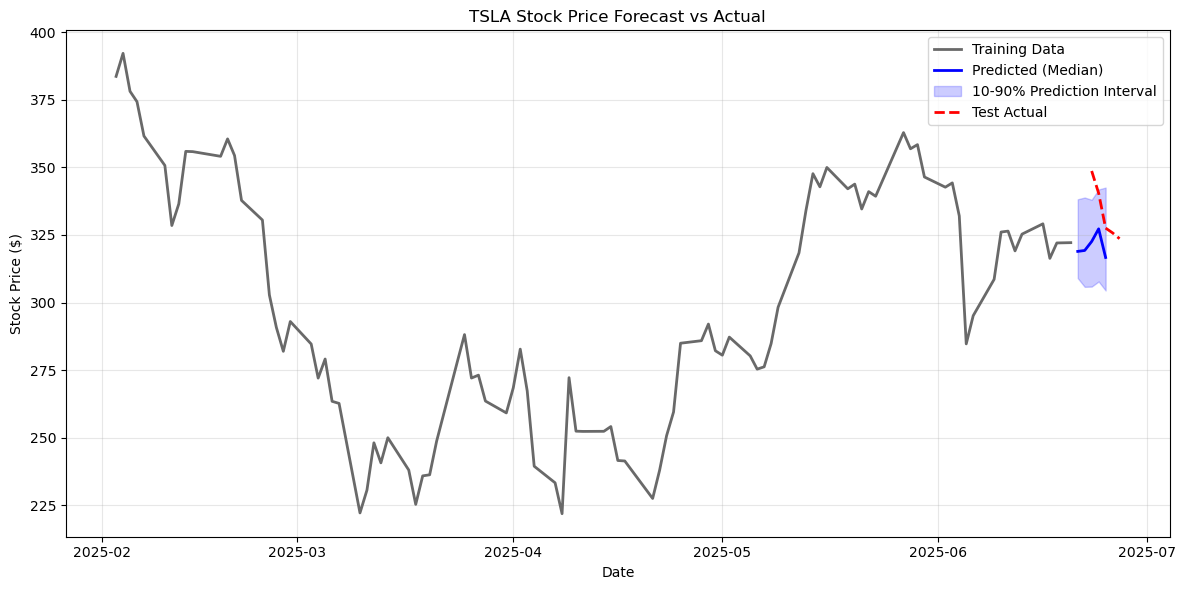

Forecast Performance Metrics:
MAE:  16.72
MSE:  324.36
RMSE: 18.01
Results saved to matrix successfully!
                    MAE         MSE       RMSE
ARIMA         16.274952  343.830831  18.542676
timesfm       16.721159  324.364743  18.010129
chronos       14.028175  280.891008  16.759803
TFT_reddit_N   5.175244   38.942936   6.240427
TFT_Reddit_Y   5.993176   40.715904   6.380901


In [3]:
from models.timesfm import main as timesfm_main
timesfm_main(interactive=True, use_model=True)

## Model Configuration Notes

- **per_core_batch_size**: Number of samples processed at once
  - Larger = faster but needs more memory
  - Local GPU → 2~4 is safe, Colab → up to 32 is good
- **horizon_len**: Can be any number
- **context_len**: Must be a multiple of 32
- **frequency_input**: 
  - 0: High frequency (daily, hourly, etc.)
  - 1: Medium frequency (weekly, monthly)
  - 2: Low frequency (quarterly, yearly)

## Forecast Interpretation

The forecast results include:
- **timesfm**: Median prediction (most likely value)
- **timesfm-q-0.1**: 10% quantile (lower uncertainty bound)
- **timesfm-q-0.5**: 50% quantile (same as median)
- **timesfm-q-0.9**: 90% quantile (upper uncertainty bound)